<a href="https://colab.research.google.com/github/IGPTsewwandi/emotion-detection/blob/main/Emotion_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Libraries

In [3]:
!pip install -q transformers datasets torch torchvision torchaudio
!pip install -q sklearn tqdm
!pip install -q scikit-learn tqdm


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# Load Dataset from Google Drive

In [4]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to your dataset file in Drive (update the path!)
path = "/content/drive/MyDrive/Emotion_Detection_in sinhala_language_text_in_Social_Media/Dataset.csv"

# Load CSV
df = pd.read_csv(path)

print("Original dataset shape:", df.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original dataset shape: (11112, 3)


,Annotator 1,Annotator 2(Yasitha),Phrase
0,joy,joy,නියම සිංහල මහත්මයෙක්.
1,joy,joy,අන්න මිනිස්සු...
2,disgust,anger,හොරා හොද මිනිහෙක් නම් අනේ මහත්තයෝ සමාවෙන්න කිය...
3,NaN,NaN,තව ඩිංගෙන් ලබු ගෙඩියත් කොස් ගෙඩි සහ පොල් ගෙඩි ...
4,disgust,disgust,"බතල වැලට, කොස්ගෙඩි අටට, උසාවි ගිහින් රිමන්ඩ් ක..."


# Preprocess Annotator Agreement

In [5]:
# Rename columns for easier handling
df = df.rename(columns={
    'Annotator 1': 'ann1',
    'Annotator 2(Yasitha)': 'ann2',
    'Phrase': 'text'
})

# Step 1: Drop rows where text is missing
df = df.dropna(subset=['text'])

# Step 2: Keep rows where both annotators gave a label (not empty)
df = df.dropna(subset=['ann1', 'ann2'])

# Step 3: Clean spaces and lowercase labels (so Joy, joy, JOY -> joy)
df['ann1'] = df['ann1'].str.strip().str.lower()
df['ann2'] = df['ann2'].str.strip().str.lower()

# Step 4: Remove rows where labels are empty after cleaning
df = df[(df['ann1'] != "") & (df['ann2'] != "")]

# Step 5: Keep only rows where both annotators agreed (same label)
df = df[df['ann1'] == df['ann2']]

# Step 6: Create final dataset with 2 columns (text, label)
final_df = df[['text', 'ann1']].rename(columns={'ann1': 'label'})

print("Clean dataset shape:", final_df.shape)
print("Unique labels after normalization:", final_df['label'].unique())
final_df.head(10)



Clean dataset shape: (3330, 2)
Unique labels after normalization: ['joy' 'disgust' 'anger' 'surprise' 'sadness' 'fear']


,text,label
0,නියම සිංහල මහත්මයෙක්.,joy
1,අන්න මිනිස්සු...,joy
4,"බතල වැලට, කොස්ගෙඩි අටට, උසාවි ගිහින් රිමන්ඩ් ක...",disgust
14,"උපුල්, පහන්, ඔබලාට ස්තූතියි.",joy
19,ඒ මනුෂ්‍යයා හොඳ කෙනෙක්.. හරිදේ ඒකයි... පින්වැඩ...,joy
20,හිතහොද මනුස්සයෙක්.,joy
34,මේ වැඩේට උපරිම දඩුවම් දෙන්න ඕනේ,anger
35,හිතක් පපුවක් නැති මිනිස්සු,anger
36,ඉතා හොදයි,joy
37,මේ වරදටනම් උපරිම දඩුවම් දෙන්න ඕනේ,anger


# Save Cleaned Dataset

In [6]:
# Save cleaned dataset back to Drive
save_path = "/content/drive/MyDrive/Emotion_Detection_in sinhala_language_text_in_Social_Media/2_coloumn_cleaned_Dataset.csv"
final_df.to_csv(save_path, index=False)
print("Saved cleaned dataset to:", save_path)


Saved cleaned dataset to: /content/drive/MyDrive/Emotion_Detection_in sinhala_language_text_in_Social_Media/2_coloumn_cleaned_Dataset.csv


# Bar Plot of Emotion Counts

Dataset shape: (3330, 2)


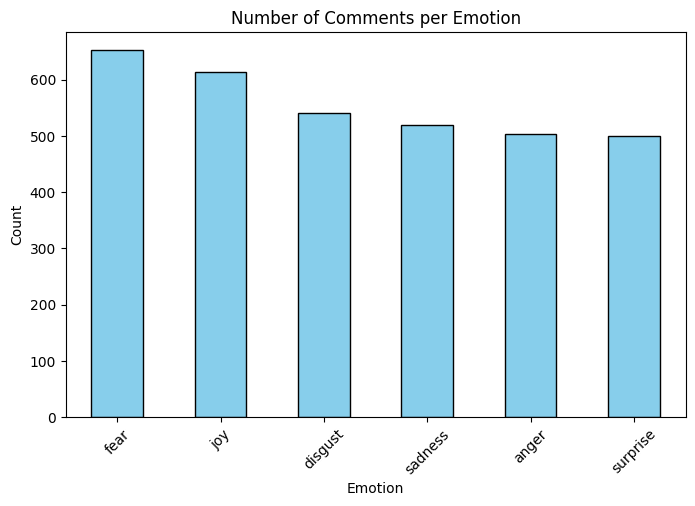

In [7]:
import pandas as pd

# Load your cleaned dataset
path = "/content/drive/MyDrive/Emotion_Detection_in sinhala_language_text_in_Social_Media/2_coloumn_cleaned_Dataset.csv"
df = pd.read_csv(path)

print("Dataset shape:", df.shape)
df.head()
import matplotlib.pyplot as plt

# Count how many comments per label
label_counts = df['label'].value_counts()

# Bar plot
plt.figure(figsize=(8,5))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Comments per Emotion")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# Remove Duplicates

In [8]:
import pandas as pd

# Load dataset
path = "/content/drive/MyDrive/Emotion_Detection_in sinhala_language_text_in_Social_Media/2_coloumn_cleaned_Dataset.csv"
df = pd.read_csv(path)

print("Before removing duplicates:", df.shape)

# Count duplicates per category
dup_counts = (
    df[df.duplicated(subset=['text', 'label'], keep=False)]
    .groupby('label')
    .size()
)

print("\nDuplicates found per emotion:")
print(dup_counts)

# Drop duplicates (keep first occurrence)
df = df.drop_duplicates(subset=['text', 'label']).reset_index(drop=True)

print("\nAfter removing duplicates:", df.shape)

# Save cleaned dataset
save_path = "/content/drive/MyDrive/Emotion_Detection_in sinhala_language_text_in_Social_Media/step1_cleaned_no_duplicates.csv"
df.to_csv(save_path, index=False)
print("✅ Saved cleaned dataset (no duplicates) to:", save_path)



Before removing duplicates: (3330, 2)

Duplicates found per emotion:
label
anger        4
fear       296
sadness      2
dtype: int64

After removing duplicates: (3179, 2)
✅ Saved cleaned dataset (no duplicates) to: /content/drive/MyDrive/Emotion_Detection_in sinhala_language_text_in_Social_Media/step1_cleaned_no_duplicates.csv


# Bar Plot After Removing Duplicates

Number of comments per emotion:
joy: 614
disgust: 540
sadness: 519
fear: 504
anger: 502
surprise: 500


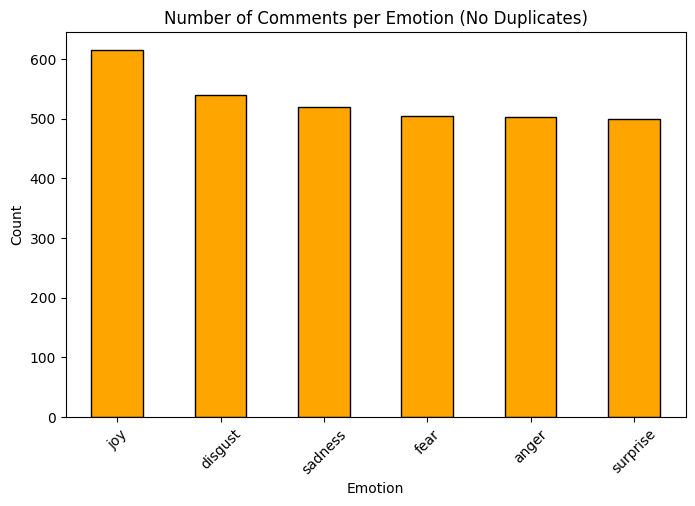

In [9]:
import matplotlib.pyplot as plt

# Count how many comments per label
label_counts = df['label'].value_counts()

# Print counts
print("Number of comments per emotion:")
for emotion, count in label_counts.items():
    print(f"{emotion}: {count}")

# Bar plot
plt.figure(figsize=(8,5))
label_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Number of Comments per Emotion (No Duplicates)")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



# Preprocess Sinhala Text

In [10]:
import re

def clean_sinhala(text):
    if not isinstance(text, str):
        return ""
    # remove links, numbers, emojis
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'[0-9]+', ' ', text)
    text = re.sub(r'[^\u0D80-\u0DFF\s]', ' ', text)  # keep only Sinhala range + space
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['text_clean'] = df['text'].astype(str).map(clean_sinhala)
print(df[['text','text_clean']].head())


                                                text  \
0                              නියම සිංහල මහත්මයෙක්.   
1                                   අන්න මිනිස්සු...   
2  බතල වැලට, කොස්ගෙඩි අටට, උසාවි ගිහින් රිමන්ඩ් ක...   
3                       උපුල්, පහන්, ඔබලාට ස්තූතියි.   
4  ඒ මනුෂ්‍යයා හොඳ කෙනෙක්.. හරිදේ ඒකයි... පින්වැඩ...   

                                          text_clean  
0                               නියම සිංහල මහත්මයෙක්  
1                                      අන්න මිනිස්සු  
2  බතල වැලට කොස්ගෙඩි අටට උසාවි ගිහින් රිමන්ඩ් කරන...  
3                          උපුල් පහන් ඔබලාට ස්තූතියි  
4  ඒ මනුෂ් යයා හොඳ කෙනෙක් හරිදේ ඒකයි පින්වැඩි කමට...  


# Encode Labels

In [21]:
from sklearn.preprocessing import LabelEncoder
import pickle

le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])
print("Classes:", le.classes_)
n_classes = len(le.classes_)

# --- Save the label encoder ---
with open("/content/drive/MyDrive/Emotion_Detection_in_sinhala_language_text_in_Social_Media/label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("✅ Label encoder saved successfully!")



Classes: ['anger' 'disgust' 'fear' 'joy' 'sadness' 'surprise']
✅ Label encoder saved successfully!


# Sinhala-BERT Tokenizer & Dataset

In [12]:
from transformers import AutoTokenizer
from torch.utils.data import Dataset, DataLoader
import torch

MODEL_NAME = "Ransaka/bert-small-sentence-transformer-sinhala"   # ✅ Sinhala-BERT model
MAX_LEN = 128
BATCH_SIZE = 16

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

class SinhalaDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        enc = self.tokenizer.encode_plus(
            self.texts[idx],
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding="max_length",
            return_attention_mask=True,
            return_tensors="pt"
        )
        return {
            "input_ids": enc["input_ids"].squeeze(0),
            "attention_mask": enc["attention_mask"].squeeze(0),
            "label": torch.tensor(self.labels[idx], dtype=torch.long)
        }


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

# Train/Validation Split

In [13]:
from sklearn.model_selection import train_test_split

# Split: 80% train, 20% test
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label_enc'], random_state=42)

print("Train size:", train_df.shape, "Test size:", test_df.shape)

# Save them if you want
train_df.to_csv("/content/drive/MyDrive/Emotion_Detection_in sinhala_language_text_in_Social_Media/sinhala_emotion_train.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/Emotion_Detection_in sinhala_language_text_in_Social_Media/sinhala_emotion_test.csv", index=False)



Train size: (2543, 4) Test size: (636, 4)


# Define BERT-CNN Model (Sinhala)

In [14]:
import torch.nn as nn
import torch.nn.functional as F
from transformers import AutoModel

class SinhalaBertCNN(nn.Module):
    def __init__(self, pretrained_name, num_classes, filter_sizes=[3,4,5], num_filters=100, dropout=0.5):
        #super(SinhalaBertCNN, self).__init__()
        super().__init__()
        self.bert = AutoModel.from_pretrained(pretrained_name)
        hidden_size = self.bert.config.hidden_size
        self.convs = nn.ModuleList([
            nn.Conv1d(hidden_size, num_filters, fs)
            for fs in filter_sizes
        ])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(num_filters * len(filter_sizes), num_classes)

    def forward(self, input_ids, attention_mask):
        bert_out = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden = bert_out.last_hidden_state  # (batch, seq_len, hidden)
        x = last_hidden.permute(0, 2, 1)          # (batch, hidden, seq_len)
        convs = [F.relu(conv(x)) for conv in self.convs]
        pooled = [F.max_pool1d(c, c.shape[2]).squeeze(2) for c in convs]
        cat = torch.cat(pooled, dim=1)
        cat = self.dropout(cat)
        return self.fc(cat)

model = SinhalaBertCNN(MODEL_NAME, n_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


config.json:   0%|          | 0.00/630 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/83.7M [00:00<?, ?B/s]

SinhalaBertCNN(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 384, padding_idx=0)
      (position_embeddings): Embedding(512, 384)
      (token_type_embeddings): Embedding(2, 384)
      (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-5): 6 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=384, out_features=384, bias=True)
              (key): Linear(in_features=384, out_features=384, bias=True)
              (value): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
              (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_

# Training Loop (with Class Weights ⚖️)

In [15]:
from torch.optim import AdamW
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# ====================================================
# Compute Class Weights (from training set only ✅)
# ====================================================
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_df['label_enc']),
    y=train_df['label_enc']
)
print("Class Weights:", class_weights)

class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# ✅ Use class weights in CrossEntropyLoss
criterion = nn.CrossEntropyLoss(weight=class_weights)

# ====================================================
# Training Functions
# ====================================================
def train_epoch(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for batch in loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        logits = model(input_ids, attention_mask)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def eval_model(model, loader):
    model.eval()
    preds, trues = [], []
    with torch.no_grad():
        for batch in loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)
            logits = model(input_ids, attention_mask)
            pred = torch.argmax(logits, dim=1).cpu().numpy()
            preds.extend(pred)
            trues.extend(labels.cpu().numpy())
    return trues, preds


Class Weights: [1.05431177 0.98109568 1.05169562 0.86320434 1.02128514 1.05958333]


# Cross-Validation on Training Set

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Convert to arrays
texts = train_df['text_clean'].tolist()
labels = train_df['label_enc'].tolist()

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

fold = 1
cv_acc, cv_reports = [], []

for train_index, val_index in skf.split(texts, labels):
    print(f"\n🔹 Fold {fold}")

    X_train = [texts[i] for i in train_index]
    y_train = [labels[i] for i in train_index]
    X_val   = [texts[i] for i in val_index]
    y_val   = [labels[i] for i in val_index]

    train_dataset = SinhalaDataset(X_train, y_train, tokenizer, MAX_LEN)
    val_dataset   = SinhalaDataset(X_val, y_val, tokenizer, MAX_LEN)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

    # Reset model + optimizer each fold
    model = SinhalaBertCNN(MODEL_NAME, n_classes).to(device)
    optimizer = AdamW(model.parameters(), lr=4e-5)

    for epoch in range(1):
        train_loss = train_epoch(model, train_loader, optimizer, criterion)
        trues, preds = eval_model(model, val_loader)
        acc = accuracy_score(trues, preds)
        print(f"Fold {fold} | Epoch {epoch+1} | Loss={train_loss:.4f} | Acc={acc:.4f}")

    print(classification_report(trues, preds, target_names=le.classes_))
    cv_acc.append(acc)
    cv_reports.append(classification_report(trues, preds, target_names=le.classes_, output_dict=True))
    fold += 1

print("\n✅ Cross-validation mean accuracy:", np.mean(cv_acc))



🔹 Fold 1
Fold 1 | Epoch 1 | Loss=1.3580 | Acc=0.6144
              precision    recall  f1-score   support

       anger       0.49      0.57      0.53       134
     disgust       0.50      0.40      0.44       144
        fear       0.62      0.69      0.66       134
         joy       0.84      0.91      0.87       164
     sadness       0.57      0.46      0.51       138
    surprise       0.59      0.60      0.60       134

    accuracy                           0.61       848
   macro avg       0.60      0.61      0.60       848
weighted avg       0.61      0.61      0.61       848


🔹 Fold 2
Fold 2 | Epoch 1 | Loss=1.3715 | Acc=0.6486
              precision    recall  f1-score   support

       anger       0.63      0.37      0.47       134
     disgust       0.48      0.66      0.56       144
        fear       0.77      0.72      0.74       135
         joy       0.76      0.89      0.82       164
     sadness       0.68      0.45      0.54       138
    surprise       0.61 

# Load the Saved Test Dataset

In [17]:
import pandas as pd
test_path = "/content/drive/MyDrive/Emotion_Detection_in sinhala_language_text_in_Social_Media/sinhala_emotion_test.csv"
test_df = pd.read_csv(test_path)

test_path = "/content/drive/MyDrive/Emotion_Detection_in sinhala_language_text_in_Social_Media/sinhala_emotion_test.csv"
test_df = pd.read_csv(test_path)

test_dataset = SinhalaDataset(
    test_df['text_clean'].tolist(),
    test_df['label_enc'].tolist(),
    tokenizer,
    MAX_LEN
)

test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)




# Retrain on Full Training Set

In [18]:
import os

# Build final train_loader from full training data
train_dataset = SinhalaDataset(
    train_df['text_clean'].tolist(),
    train_df['label_enc'].tolist(),
    tokenizer,
    MAX_LEN
)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Reset model + optimizer
model = SinhalaBertCNN(MODEL_NAME, n_classes).to(device)
optimizer = AdamW(model.parameters(), lr=4e-5)

EPOCHS = 5
best_acc = 0.0

save_path = "/content/drive/MyDrive/Emotion_Detection_in_sinhala_language_text_in_Social_Media/sinhala_emotion_model"
os.makedirs(save_path, exist_ok=True)  # ✅ ensure folder exists

for epoch in range(EPOCHS):
    train_loss = train_epoch(model, train_loader, optimizer, criterion)
    trues, preds = eval_model(model, test_loader)
    acc = accuracy_score(trues, preds)

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss={train_loss:.4f}, Acc={acc:.4f}")
    print(classification_report(trues, preds, target_names=le.classes_))

    if acc > best_acc:
        best_acc = acc
        torch.save(model.state_dict(), f"{save_path}/pytorch_model.bin")  # ✅ safe
        tokenizer.save_pretrained(save_path)
        print(f"✅ Model saved at {save_path} (Acc={best_acc:.4f})")



Epoch 1/5, Loss=1.2684, Acc=0.6541
              precision    recall  f1-score   support

       anger       0.50      0.50      0.50       100
     disgust       0.57      0.38      0.46       108
        fear       0.71      0.76      0.74       101
         joy       0.90      0.81      0.85       123
     sadness       0.64      0.66      0.65       104
    surprise       0.58      0.79      0.67       100

    accuracy                           0.65       636
   macro avg       0.65      0.65      0.64       636
weighted avg       0.66      0.65      0.65       636

✅ Model saved at /content/drive/MyDrive/Emotion_Detection_in_sinhala_language_text_in_Social_Media/sinhala_emotion_model (Acc=0.6541)
Epoch 2/5, Loss=0.7915, Acc=0.7028
              precision    recall  f1-score   support

       anger       0.60      0.33      0.43       100
     disgust       0.52      0.68      0.59       108
        fear       0.72      0.86      0.78       101
         joy       0.91      0.86   

# Load the Saved Model & Tokenizer

In [22]:
import torch
import pickle
import os
from pathlib import Path
from transformers import AutoTokenizer

# ✅ Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Path to saved model + tokenizer
save_path = Path("/content/drive/MyDrive/Emotion_Detection_in_sinhala_language_text_in_Social_Media/sinhala_emotion_model")

# --- Load Tokenizer ---
tokenizer = AutoTokenizer.from_pretrained(str(save_path), local_files_only=True)

# --- Load Model ---
# Make sure you have defined SinhalaBertCNN(MODEL_NAME, n_classes)
model = SinhalaBertCNN(MODEL_NAME, n_classes).to(device)
model.load_state_dict(torch.load(save_path / "pytorch_model.bin", map_location=device))
model.eval()

print("✅ Model and tokenizer loaded successfully!")

# --- Load Label Encoder ---
with open("/content/drive/MyDrive/Emotion_Detection_in_sinhala_language_text_in_Social_Media/label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

print("✅ Label encoder loaded successfully!")


✅ Model and tokenizer loaded successfully!
✅ Label encoder loaded successfully!


# Evaluate on Test Set

🎯 Final Test Report
              precision    recall  f1-score   support

       anger       0.60      0.33      0.43       100
     disgust       0.52      0.68      0.59       108
        fear       0.72      0.86      0.78       101
         joy       0.91      0.86      0.89       123
     sadness       0.78      0.63      0.70       104
    surprise       0.69      0.82      0.75       100

    accuracy                           0.70       636
   macro avg       0.70      0.70      0.69       636
weighted avg       0.71      0.70      0.70       636

Accuracy: 0.7028301886792453


<Figure size 700x700 with 0 Axes>

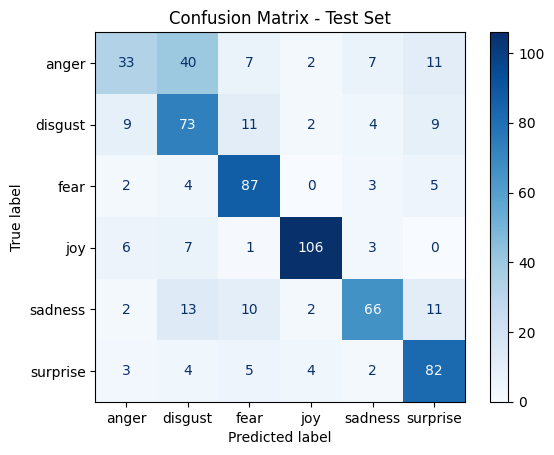

In [23]:
trues, preds = eval_model(model, test_loader)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("🎯 Final Test Report")
print(classification_report(trues, preds, target_names=le.classes_))
print("Accuracy:", accuracy_score(trues, preds))

# Confusion Matrix
cm = confusion_matrix(trues, preds)
plt.figure(figsize=(7,7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Test Set")
plt.show()



# Predict on New Sinhala Text

In [24]:
def predict_text(text):
    text = clean_sinhala(text)  # ✅ clean before tokenize
    enc = tokenizer.encode_plus(
        text,
        return_tensors="pt",
        padding="max_length",
        truncation=True,
        max_length=MAX_LEN,
        return_attention_mask=True
    )
    input_ids = enc["input_ids"].to(device)
    attention_mask = enc["attention_mask"].to(device)

    model.eval()  # ✅ make sure in eval mode
    with torch.no_grad():
        logits = model(input_ids, attention_mask)
        pred = torch.argmax(logits, dim=1).cpu().item()
    return le.classes_[pred]

# Example Sinhala text
print(predict_text("මම දැන් සතුටින් ඉන්නවා"))


joy
